In [159]:
import ipywidgets as widgets
from IPython.display import display


In [160]:
#Widget definitions
betaR = widgets.FloatSlider(
    value=-0.03,
    min=-0.1,
    max=0.1,
    step=0.005,
    description=r'$\beta_R$:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)
betaT = widgets.FloatSlider(
    value=0.0,
    min=-0.1,
    max=0.1,
    step=0.005,
    description=r'$\beta_T$:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)
alphaT = widgets.FloatSlider(
    value=0.0,
    min=0,
    max=100,
    step=1,
    description=r'$\alpha_T$ in ppm/K:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
alphaR = widgets.FloatSlider(
    value=25.0,
    min=0,
    max=100,
    step=1,
    description=r'$\alpha_R$ in ppm/K:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)


DT = widgets.FloatText(value=-160.0,description=r'$\Delta T$:')
flangelength = widgets.FloatText(value=50.0,description=r'flange length in mm:')
phi = widgets.FloatText(value=90.0,description=r'$\tilde{\varphi}$ in $^\circ$:')
radius = widgets.FloatText(value=5.0,description=r'radius in mm:')

In [161]:

def Radford(phi,at,ar,bt,br,DT):
    
    dphithermal = phi*((at-ar)*DT*1.0E-6/(1+ar*1.0E-6*DT))
    dphichemical = phi*((bt-br)/(1+br))
    dphitotal = dphithermal + dphichemical
    #print(dphithermal,dphichemical,dphitotal)
    
    return dphithermal,dphichemical,dphitotal




In [162]:
import matplotlib.pyplot as plt
import numpy as np


#For plotting only
def radplot(dphi,phi0,r,l):
    X,Y = [],[]
    
    X.append(-l)
    Y.append(0.0)
    
    
    angle = np.linspace(0,dphi+phi0,100)
    
    for a in angle:
        xval = np.sin(np.deg2rad(a))*r
        X.append(xval)
        yval = r - np.cos(np.deg2rad(a))*r
        Y.append(yval)
    
    
    X.append(X[-1] + np.cos(np.deg2rad(a))*l)
    Y.append(Y[-1]+ np.sin(np.deg2rad(a))*l)

    return[X,Y]

In [165]:
display(phi)
display(alphaT)
display(alphaR)
display(betaT)
display(betaR)
display(DT)

#For illustration
display(radius)
display(flangelength)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

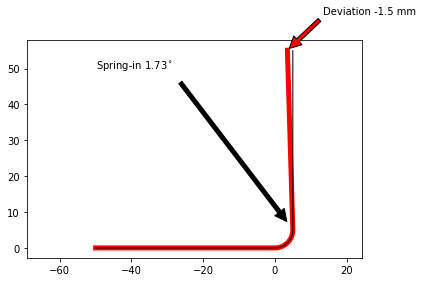

In [166]:
#Function calls
DPHIT, DPHIC, DPHITOT = Radford(phi.value, alphaT.value, alphaR.value, betaT.value, betaR.value, DT.value)
#Data to plot
X,Y = radplot(DPHITOT,phi.value,radius.value,flangelength.value)
X0,Y0 = radplot(0,90,5,50)


plt.axis('equal')
plt.plot(X,Y,'r', linewidth=5)
plt.plot(X0,Y0,'k', linewidth=1 )

plt.annotate('Deviation %4.1f mm'%(X[-1]-radius.value), xy=(X[-1], Y[-1]), xytext=(X[-1]+10, Y[-1]+10),
            arrowprops=dict(facecolor='r', shrink=0.05),
            )
plt.annotate('Spring-in %3.2f$^\circ$'%(DPHITOT), xy=(X[-2], Y[-2]), xytext=(-flangelength.value, 50),
            arrowprops=dict(facecolor='k', shrink=0.05),
            )

plt.show(True)